**Source of the Data is from
historical weather records San Francisco, USA, as originally published by Jeff Hammerbacher on Kaggle.**


In [4]:
from google.colab import files
uploaded = files.upload()


Saving weatherHistory.csv to weatherHistory.csv


In [10]:
import pandas as pd

# Load the uploaded file
weather_df = pd.read_csv('weatherHistory.csv')

# Inspect the data
print("weather_df type:", type(weather_df))
print("weather_df shape:", weather_df.shape)
print("weather_df columns:", weather_df.columns.tolist())

# Display the first few rows
weather_df.info()
weather_df.head()


weather_df type: <class 'pandas.core.frame.DataFrame'>
weather_df shape: (96453, 12)
weather_df columns: ['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)', 'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover', 'Pressure (millibars)', 'Daily Summary']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibi

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [11]:
#Cleaning Process using  a wrangle function
import pandas as pd

def wrangle_weather_data(file_path):
    """
    Loads and cleans weather data from a CSV file.

    Steps:
    - Load CSV
    - Rename 'Loud Cover' to 'Cloud Cover'
    - Convert 'Formatted Date' to datetime
    - Handle missing values in 'Precip Type'
    - Set 'Formatted Date' as index

    Returns:
    - Cleaned Pandas DataFrame
    """
    # Load data
    df = pd.read_csv(file_path)

    # Rename incorrect column
    if 'Loud Cover' in df.columns:
        df.rename(columns={"Loud Cover": "Cloud Cover"}, inplace=True)

    # Convert date column to datetime
    df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

    # Fill missing precipitation values with 'unknown'
    if 'Precip Type' in df.columns:
        df['Precip Type'].fillna('unknown', inplace=True)

    # Set datetime as index
    df.set_index('Formatted Date', inplace=True)

    return df



In [12]:
# Clean the dataset
weather_df = wrangle_weather_data('weatherHistory.csv')

# Check results
weather_df.info()
weather_df.head()


<ipython-input-11-7f9283f6620d>:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Precip Type'].fillna('unknown', inplace=True)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96453 entries, 2006-03-31 22:00:00+00:00 to 2016-09-09 21:00:00+00:00
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               96453 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Cloud Cover               96453 non-null  float64
 9   Pressure (millibars)      96453 non-null  float64
 10  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(3)
memory usage: 8.8+ MB


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [17]:
print(type(weather_df.index))  # Should return <class 'pandas.core.indexes.datetimes.DatetimeIndex'>



<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [18]:
# Exploratory Data Analysis (EDA) & Visualizations
#Summary Statistics
# Summary statistics of numeric columns
weather_df.describe()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Cloud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


 we observe that the **average temperature** is approximately **11.9°C**, with values ranging from **-21.8°C** to **39.9°C**, suggesting a wide seasonal variation. The **apparent temperature**, or "feels-like" temperature, closely tracks the actual temperature but is slightly lower on average, likely due to wind and humidity effects. **Humidity** levels are generally high (mean ≈ 0.73), indicating a relatively moist climate, with most values between **0.60 and 0.89**. The **wind speed** averages around **10.8 km/h**, but can spike up to nearly **64 km/h**, while the **wind direction** is well distributed, centered around 187°, hinting at dominant southerly winds. **Visibility** is typically good, averaging over **10 km**, though it occasionally drops to zero. Interestingly, **cloud cover is consistently reported as 0.0**, . Lastly, **atmospheric pressure** centers around **1003 mb**, with a healthy spread, suggesting natural daily and seasonal fluctuations.


<ipython-input-19-e4d8412b2191>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg = weather_df['Temperature (C)'].resample('M').mean()


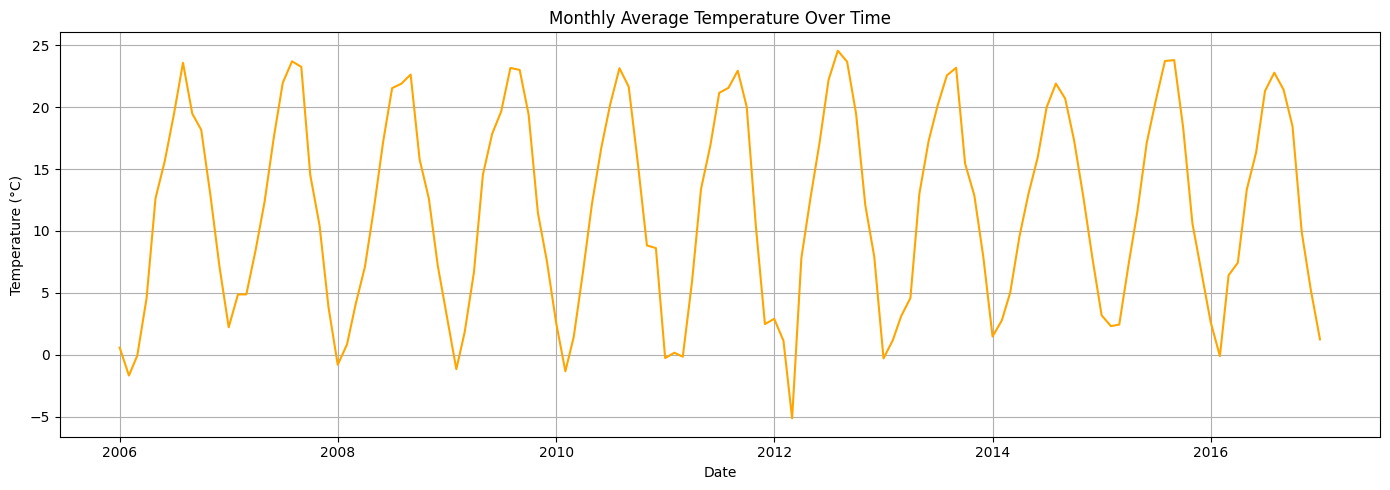

In [19]:
# Temperature Trends Over Time
import matplotlib.pyplot as plt

# Resample to monthly average temperature
monthly_avg = weather_df['Temperature (C)'].resample('M').mean()

plt.figure(figsize=(14, 5))
plt.plot(monthly_avg, color='orange')
plt.title("Monthly Average Temperature Over Time")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.tight_layout()
plt.show()


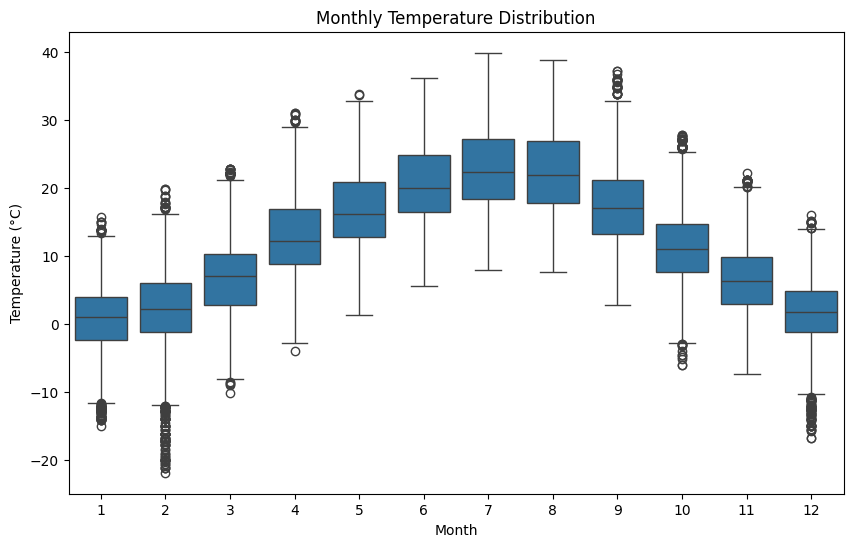

In [22]:
# Average Temperature by Month (Seasonal Trend)

# Extract month
weather_df['Month'] = weather_df.index.month

# Boxplot to see seasonal variation
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='Temperature (C)', data=weather_df)
plt.title("Monthly Temperature Distribution")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.show()


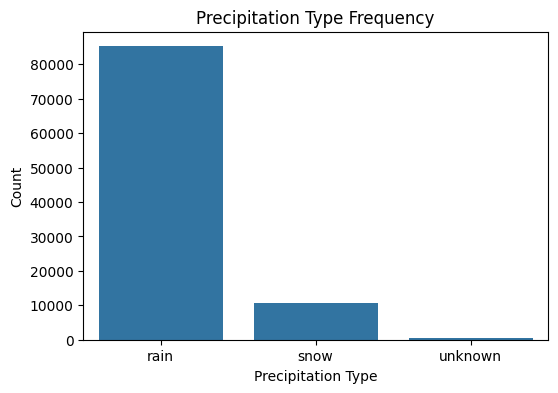

In [20]:
#Precipitation Type Frequency
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x='Precip Type', data=weather_df)
plt.title("Precipitation Type Frequency")
plt.xlabel("Precipitation Type")
plt.ylabel("Count")
plt.show()


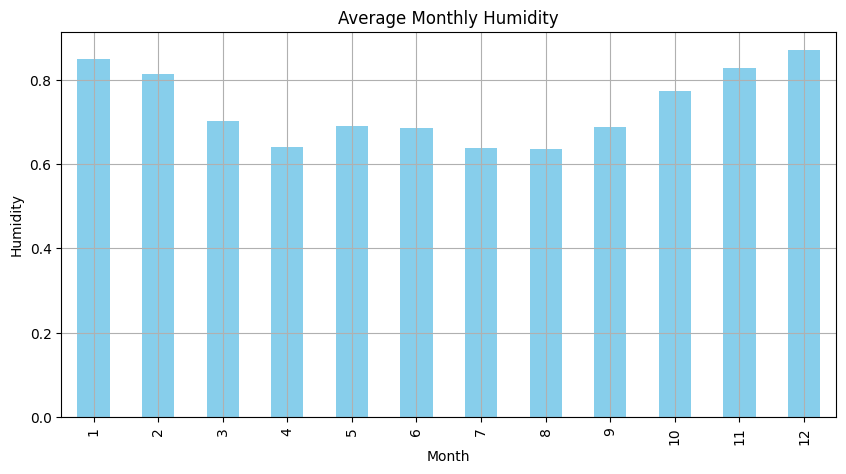

In [23]:
#Humidity Pattern Exploration
# Average humidity by month
monthly_humidity = weather_df.groupby('Month')['Humidity'].mean()

plt.figure(figsize=(10, 5))
monthly_humidity.plot(kind='bar', color='skyblue')
plt.title("Average Monthly Humidity")
plt.xlabel("Month")
plt.ylabel("Humidity")
plt.grid(True)
plt.show()


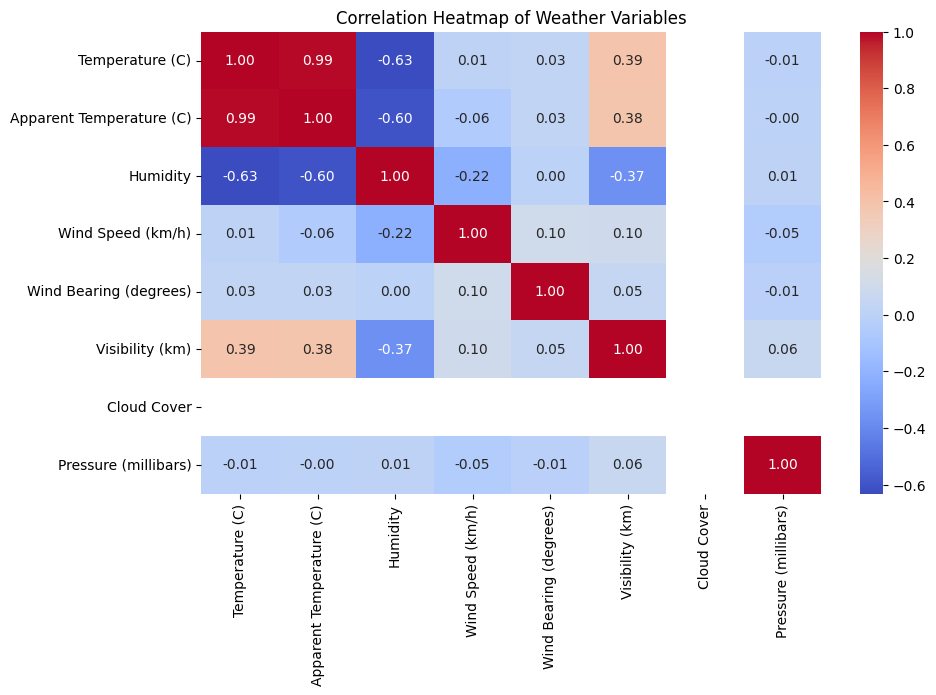

In [21]:
#Correlation Heatmap
# Select numeric columns
numeric_df = weather_df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Weather Variables")
plt.show()


This correlation matrix visually represents the relationships between different weather variables, with correlation coefficients ranging from -1 to 1:

Strong Positive Correlation: Temperature (C) and Apparent Temperature (C) (0.99) are almost identical in behavior, meaning that as the actual temperature rises, the perceived temperature also increases proportionally.

Moderate Negative Correlation: Humidity has a moderate inverse relationship with Temperature (-0.63) and Apparent Temperature (-0.60), indicating that higher temperatures tend to coincide with lower humidity levels.

Moderate Positive Correlation: Visibility (km) shows a modest positive correlation with Temperature (0.39) and Apparent Temperature (0.38), suggesting that clearer conditions are often associated with warmer weather.

Weak Correlations: Wind Speed, Wind Bearing, Cloud Cover, and Pressure display weak or negligible correlations with other weather variables, implying that these factors are relatively independent in this dataset.


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw4dnlzg/nc91b6b9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppw4dnlzg/fyaedqzn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63895', 'data', 'file=/tmp/tmppw4dnlzg/nc91b6b9.json', 'init=/tmp/tmppw4dnlzg/fyaedqzn.json', 'output', 'file=/tmp/tmppw4dnlzg/prophet_modela38wfzoy/prophet_model-20250515090816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:08:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 2.27 °C
RMSE: 2.85 °C


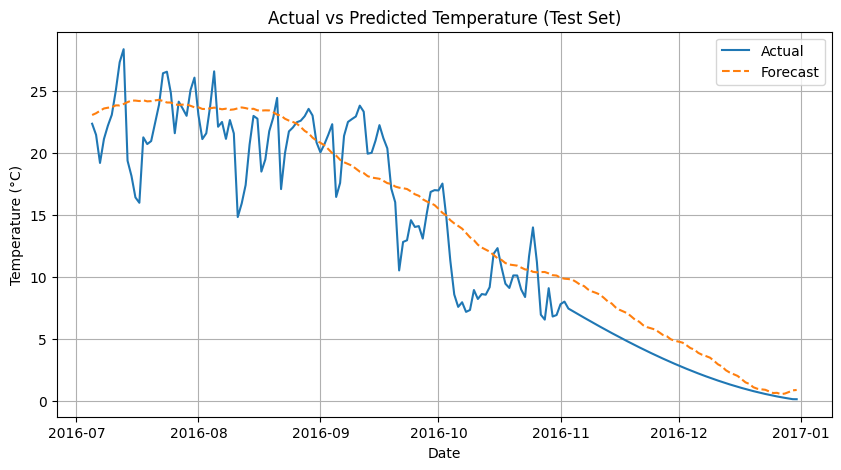

In [28]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Prepare full dataset (daily average)
df_prophet = weather_df['Temperature (C)'].resample('D').mean().reset_index()
df_prophet.columns = ['ds', 'y']
df_prophet['ds'] = df_prophet['ds'].dt.tz_localize(None)

# Step 2: Train/test split (last 180 days as test)
split_date = df_prophet['ds'].max() - pd.Timedelta(days=180)
train = df_prophet[df_prophet['ds'] <= split_date]
test = df_prophet[df_prophet['ds'] > split_date]

# Step 3: Train model on train set
model = Prophet()
model.fit(train)

# Step 4: Make forecast for the test period
future = model.make_future_dataframe(periods=180)
forecast = model.predict(future)

# Step 5: Merge forecast with test data
forecast_filtered = forecast[forecast['ds'].isin(test['ds'])]
results = test.merge(forecast_filtered[['ds', 'yhat']], on='ds')

# Step 6: Evaluate
mae = mean_absolute_error(results['y'], results['yhat'])
rmse = np.sqrt(mean_squared_error(results['y'], results['yhat']))

print(f"MAE: {mae:.2f} °C")
print(f"RMSE: {rmse:.2f} °C")

# Step 7: Visualize
plt.figure(figsize=(10,5))
plt.plot(results['ds'], results['y'], label='Actual')
plt.plot(results['ds'], results['yhat'], label='Forecast', linestyle='--')
plt.title("Actual vs Predicted Temperature (Test Set)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()
